# Identifying Yoga Poses

We've collected a few samples for each pose we'd like to categorize, and we need to learn how to identify which pose the user is in. We first used PoseNet to obtain a graphical representation of the poses we collected. This will produce a 36 point array of the various body part coordinates in each sample. We'll save this array along with its correct pose label to construct a dataset. First, let's import all the libraries we'll be using.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle

Let's load our data and take a peak at what those samples look like.

In [2]:
#All the coordinates rolled out into a 36 array + label column
columns = ['Nosex', 'Nosey', 'Neckx', 'Necky', 'RShoulderx', 'RShouldery', 'RElbowx', \
           'RElbowy', 'RWristx', 'RWristy', 'LShoulderx', 'LShouldery' , 'LElbowx', 'LElbowy' , \
           'LWristx', 'LWristy', 'RHipx', 'RHipy', 'RKneex', 'RKneey', 'RAnklex', 'RAnkley', \
           'LHipx', 'LHipy', 'LKneex', 'LKneey', 'LAnklex', 'LAnkley', 'REyex', 'REyey', 'LEyex',\
           'LEyey', 'REarx', 'REary', 'LEarx', 'LEary', 'labels']
dataset = pd.read_csv('./poses/poses.csv', names=columns)
dataset.head()

,Nosex,Nosey,Neckx,Necky,RShoulderx,RShouldery,RElbowx,RElbowy,RWristx,RWristy,...,LAnkley,REyex,REyey,LEyex,LEyey,REarx,REary,LEarx,LEary,labels
0,0.814815,0.543478,0.722222,0.608696,0.722222,0.521739,0.685185,0.326087,0.666667,0.173913,...,0.869565,0.814815,0.521739,0.833333,0.565217,0.796296,0.500000,0.833333,0.608696,plank
1,0.111111,0.413043,0.222222,0.326087,0.222222,0.304348,0.000000,0.000000,0.000000,0.000000,...,0.695652,0.000000,0.000000,0.111111,0.391304,0.000000,0.000000,0.111111,0.326087,plank
2,0.777778,0.521739,0.685185,0.456522,0.685185,0.456522,0.685185,0.695652,0.685185,0.869565,...,0.000000,0.777778,0.500000,0.000000,0.000000,0.759259,0.456522,0.000000,0.000000,plank
3,0.000000,0.000000,0.759259,0.326087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.695652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,plank
4,0.907407,0.478261,0.759259,0.326087,0.759259,0.347826,0.740741,0.869565,0.851852,0.847826,...,0.000000,0.907407,0.434783,0.000000,0.000000,0.870370,0.326087,0.000000,0.000000,plank


Format the data so we can feed it to a model.

In [3]:
# Spliting the points and the labels
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 36].values

# And split the data into appropriate data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

#Scale the data - KNN likes scaled data :D
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Our data is ready to feed it to a model! Our first approach will be to classify which pose the user is currently in. If the user is not in the correct pose, we'll give them some advice on how to execute it. As we progress, we'll want to think about how to evaluate the user's pose, ie. how well are they execuring the pose. But for now, let's just determine if a user is in the right pose.

We'll try K-Neearest Neighbors. This algorithm will cluster all the similar poses together into (hopefully) differentiated groups so when a new pose sample gets introduced, the model will know what group that pose belongs to. When it finds which group the pose should be put it, it will be associated with that group's particular label. 

Which K should we use? The default is k=5, ie look at the closest 5 neighbors. However this may not be the best K for our data. Since we don't have too many samples, lets iterate through K = 1-40 and see which K returns the model with the lowest error score compared to our test set. 

In [4]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
print(error)

#Let's see which K gives us the lowest error:
best_k = error.index(min(error))
print('Best K: ', best_k)

[0.5600907029478458, 0.5827664399092971, 0.5306122448979592, 0.5124716553287982, 0.4988662131519274, 0.5011337868480725, 0.4852607709750567, 0.4875283446712018, 0.4875283446712018, 0.48299319727891155, 0.4671201814058957, 0.46938775510204084, 0.4580498866213152, 0.4603174603174603, 0.48299319727891155, 0.4852607709750567, 0.47392290249433106, 0.4875283446712018, 0.48299319727891155, 0.47619047619047616, 0.47392290249433106, 0.49206349206349204, 0.48299319727891155, 0.4943310657596372, 0.4965986394557823, 0.4965986394557823, 0.5056689342403629, 0.5079365079365079, 0.4988662131519274, 0.5011337868480725, 0.4965986394557823, 0.4988662131519274, 0.4965986394557823, 0.5056689342403629, 0.5034013605442177, 0.5079365079365079, 0.4988662131519274, 0.5011337868480725, 0.5079365079365079]
Best K:  12


In [5]:
#So we'll go with the lowest error K for now
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

So here we see that looking at 20 neighbors is the best K out of our 40 possible K values. 
However, this number doesn't really tell us how well the model is actually classifying our 11 poses!
We can see how well the model is grouping samples by printing the *confusion matrix* of the model. The confusion matrix will show us how often the model gets confused about a sample and misclassifies it AND to what it misclassifies it as. 

We'll also look at the classification report which will give us the recall and precision among other stats for each label

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[35 10  4 13  4  3  2]
 [ 7 27 12  4  4  1  1]
 [ 3  4 24  3  1  1  3]
 [15  0  2 39  1  1  4]
 [ 7  5  2  3 34 15  7]
 [ 1  1  3  3 13 42  2]
 [ 6  4  2  4 18  8 33]]
                      precision    recall  f1-score   support

chaturanga_dandasana       0.47      0.49      0.48        71
               cobra       0.53      0.48      0.50        56
                 cow       0.49      0.62      0.55        39
               plank       0.57      0.63      0.60        62
           warrior_1       0.45      0.47      0.46        73
           warrior_2       0.59      0.65      0.62        65
           warrior_3       0.63      0.44      0.52        75

         avg / total       0.54      0.53      0.53       441



And to get a better view let's graph the confusion matrix.

In [7]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

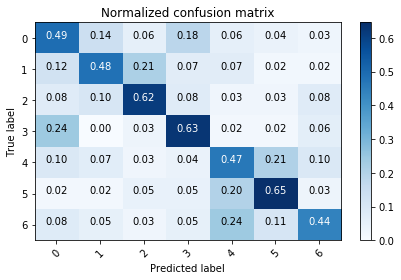

In [8]:
class_names = ['chaturanga_dandasana', 'cobra', 'cow', 'plank', 'warrior_1','warrior_2', 'warrior_3']
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Dark blue on the diagonal is what we're aiming for. We can see the model is really good at predicting *warrior_2* pose but *warrior_1* gets confused with *warrior_2* and *warrior_3* poses. However, this is a great start classifying a handful of distinct poses. We want to save the model to file so we can run inference while our virtual instructor is running.

In [10]:
filename = 'yoga_poses.sav'
pickle.dump(knn, open(filename, 'wb'))